ARIMA(Autoregressive Integrated Moving Average)

In [277]:
import pandas as pd
import numpy as np # 계산
import re # 정규표현식
from datetime import date, timedelta
import warnings
warnings.filterwarnings('ignore') # warning 메시지 제거

import seaborn as sns # 시각화
import graphviz # 시각화

In [278]:
import matplotlib.pyplot as plt

# 한글 폰트 지정
plt.rc('font', family='AppleGothic') # 맥
# plt.rc('font', family='Malgun Gothic') # 윈도우

# 마이너스 값 깨지는 현상 해결
plt.rc('axes', unicode_minus=False)

# 레티나 디스플레이 설정
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

In [279]:
tm = pd.read_csv('/Users/jungdayoung/Documents/GitHub/Learning_Spoons_Second_Project/data/full_data_ver2.csv')
tm

,일시,도_num,연도,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr),품종명,도,마켓명,가격
0,2013-01-01,0,2013,0.007216,0.770076,0.020583,0.018420,45.132576,31.543635,3.115385,토마토(10kg),강원도,가락도매,29000.0
1,2013-01-01,1,2013,0.006340,0.649199,0.013143,0.031923,44.532051,31.543635,3.800000,토마토(10kg),경기도,가락도매,29000.0
2,2013-01-01,2,2013,0.007477,0.713492,0.013913,0.030154,39.626984,31.543635,5.533333,토마토(10kg),인천광역시,가락도매,29000.0
3,2013-01-01,3,2013,0.005741,0.658125,0.008458,0.043541,38.334375,31.543635,4.600000,토마토(10kg),서울특별시,가락도매,29000.0
4,2013-01-01,4,2013,0.006363,0.739583,0.015653,0.017980,48.280093,31.543635,2.686667,토마토(10kg),경상북도,북부도매,29000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32860,2018-12-31,10,2018,0.003241,0.502206,0.018193,0.023311,22.787681,12.066176,6.600000,토마토(10kg),울산광역시,엄궁도매,30000.0
32861,2018-12-31,11,2018,0.003150,0.475868,0.017313,0.022639,29.648866,19.518839,5.921429,토마토(10kg),경상남도,엄궁도매,30000.0
32862,2018-12-31,12,2018,0.003204,0.605093,0.015468,0.027125,34.759259,22.728704,9.200000,토마토(10kg),광주광역시,각화도매,31000.0
32863,2018-12-31,13,2018,0.004119,0.373418,0.014718,0.027532,28.525591,15.960829,5.700000,토마토(10kg),부산광역시,엄궁도매,30000.0


In [280]:
tm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32865 entries, 0 to 32864
Data columns (total 14 columns):
일시             32865 non-null object
도_num          32865 non-null int64
연도             32865 non-null int64
SO2            32865 non-null float64
CO             32865 non-null float64
O3             32865 non-null float64
NO2            32865 non-null float64
PM10           32865 non-null float64
PM25           32865 non-null float64
합계 일조시간(hr)    32865 non-null float64
품종명            32865 non-null object
도              32865 non-null object
마켓명            32865 non-null object
가격             32865 non-null float64
dtypes: float64(8), int64(2), object(4)
memory usage: 3.5+ MB


In [275]:
tm['일시'] = pd.to_datetime(tm['일시'])

In [281]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [332]:
tm1 = tm.groupby(['일시']).mean()
tm1 = tm1.reset_index()

In [335]:
pd.read_csv('일별그룹_data.csv')

,일시,도_num,연도,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr),가격
0,2013-01-01,7,2013,0.008055,0.705943,0.014508,0.027351,53.793694,31.543635,4.233391,28800.000000
1,2013-01-02,7,2013,0.006252,0.458401,0.024726,0.015768,39.865292,37.602906,8.012553,28800.000000
2,2013-01-03,7,2013,0.005165,0.443746,0.021831,0.017571,26.996650,35.062375,8.083956,29066.666667
3,2013-01-04,7,2013,0.006058,0.627333,0.015143,0.029622,39.964823,37.749110,8.738554,29066.666667
4,2013-01-05,7,2013,0.006336,0.745207,0.014486,0.034354,46.933748,33.378771,7.676589,29066.666667
...,...,...,...,...,...,...,...,...,...,...,...
2186,2018-12-27,7,2018,0.003160,0.363920,0.026685,0.011358,23.527415,8.619631,8.232046,30600.000000
2187,2018-12-28,7,2018,0.003313,0.423625,0.020198,0.015384,31.120399,13.709885,7.523942,30800.000000
2188,2018-12-29,7,2018,0.003445,0.426891,0.023384,0.013958,34.862185,13.486144,8.279665,30333.333333
2189,2018-12-30,7,2018,0.003624,0.487516,0.021316,0.016805,28.162086,17.005345,8.420759,29866.666667


In [305]:
t = tm[['일시', '가격']].set_index('일시')

<Figure size 432x288 with 0 Axes>

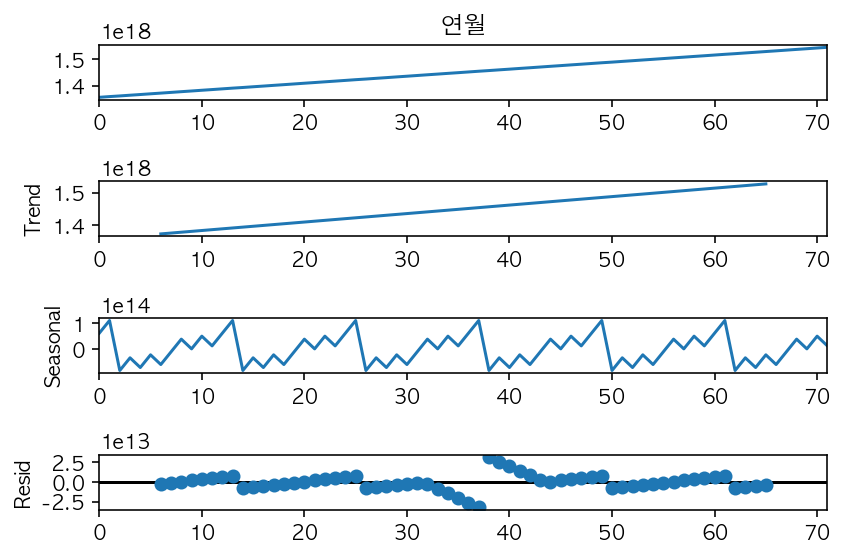

In [272]:
decomposition = seasonal_decompose(pd.to_datetime(tm1['연월']), freq=12)  
fig = plt.figure()  
fig = decomposition.plot()

In [182]:
tm2

,연월,가격
0,2013-01-01,30481.818182
1,2013-02-01,34849.122807
2,2013-03-01,33026.666667
3,2013-04-01,33266.666667
4,2013-05-01,21717.460317
...,...,...
67,2018-08-01,20963.636364
68,2018-09-01,43976.470588
69,2018-10-01,42625.396825
70,2018-11-01,33436.363636


In [183]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(tm2):

    #Determing rolling statistics
    rolmean = tm2.rolling(12).mean()
    rolstd = tm2.rolling(12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(10, 6))
    orig = plt.plot(tm2, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')

    plt.legend(loc='best'); plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print ('<Results of Dickey-Fuller Test>')
    dftest = adfuller(tm2, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

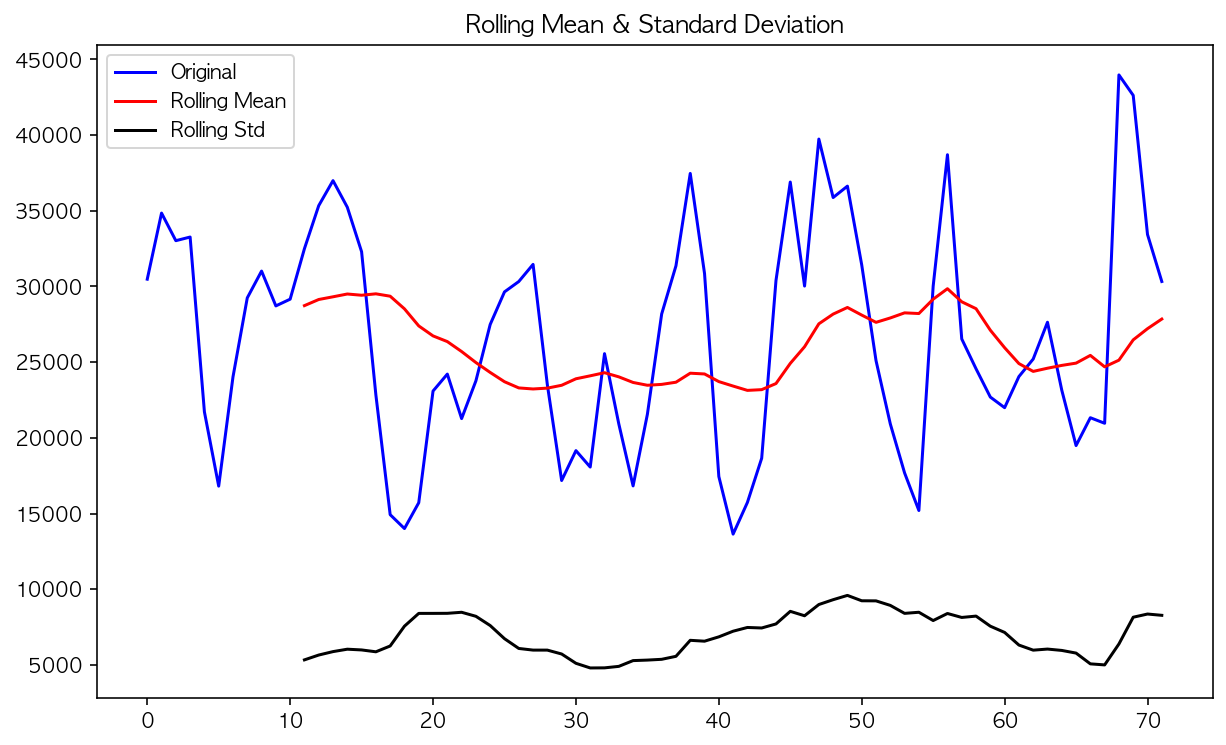

<Results of Dickey-Fuller Test>
Test Statistic                 -5.355441
p-value                         0.000004
#Lags Used                      1.000000
Number of Observations Used    70.000000
Critical Value (1%)            -3.527426
Critical Value (5%)            -2.903811
Critical Value (10%)           -2.589320
dtype: float64


In [184]:
test_stationarity(tm2['가격'])

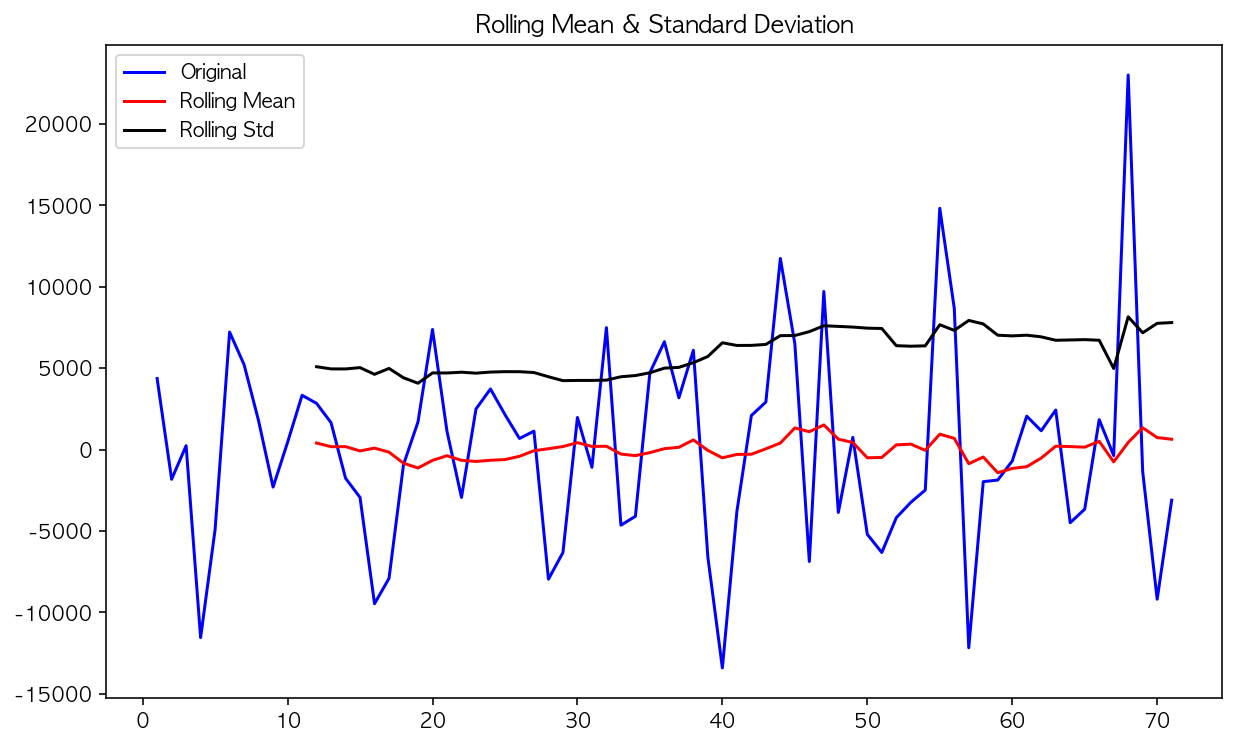

<Results of Dickey-Fuller Test>
Test Statistic                -5.851387e+00
p-value                        3.582508e-07
#Lags Used                     9.000000e+00
Number of Observations Used    6.100000e+01
Critical Value (1%)           -3.542413e+00
Critical Value (5%)           -2.910236e+00
Critical Value (10%)          -2.592745e+00
dtype: float64


In [185]:
tm2['first_difference'] = tm2['가격'] - tm2['가격'].shift(1)  
# Or Alternatively,
# df.diff().plot()
test_stationarity(tm2.first_difference.dropna(inplace=False))

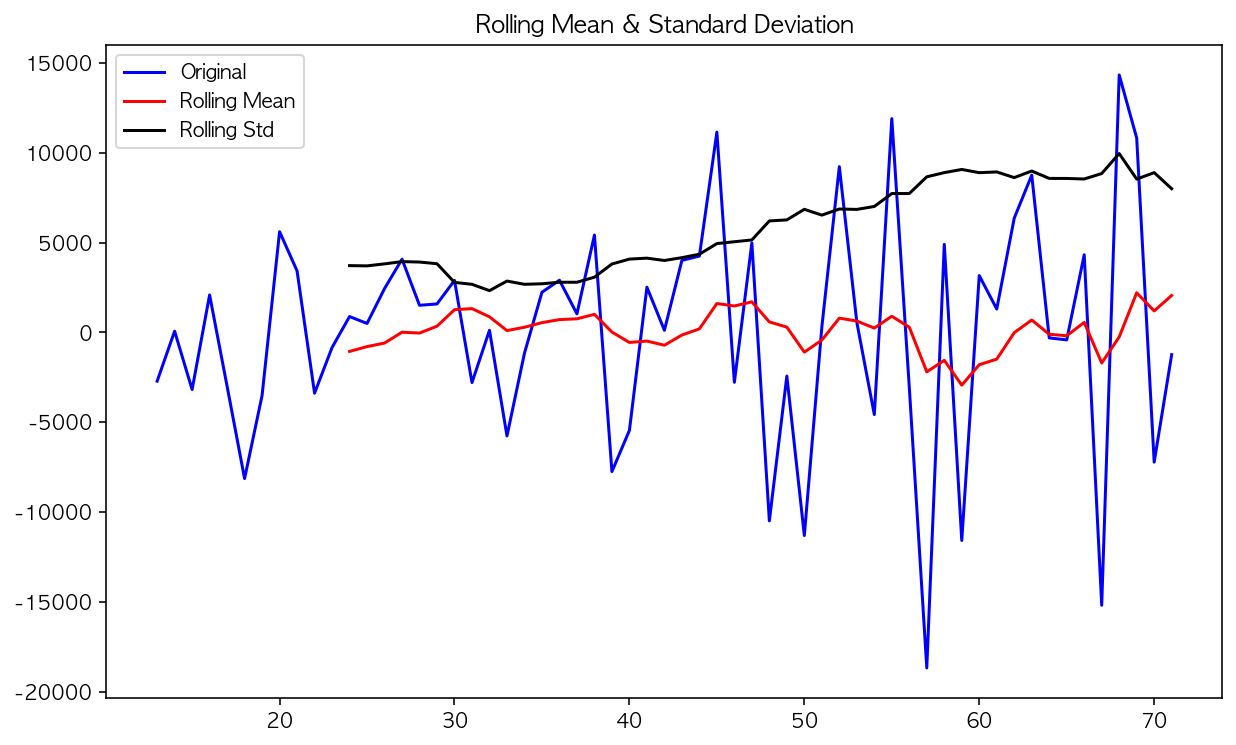

<Results of Dickey-Fuller Test>
Test Statistic                 -3.459437
p-value                         0.009092
#Lags Used                     11.000000
Number of Observations Used    47.000000
Critical Value (1%)            -3.577848
Critical Value (5%)            -2.925338
Critical Value (10%)           -2.600774
dtype: float64


In [187]:
tm2['seasonal_first_difference'] = tm2['first_difference'] - tm2['first_difference'].shift(12)  
test_stationarity(tm2.seasonal_first_difference.dropna(inplace=False))

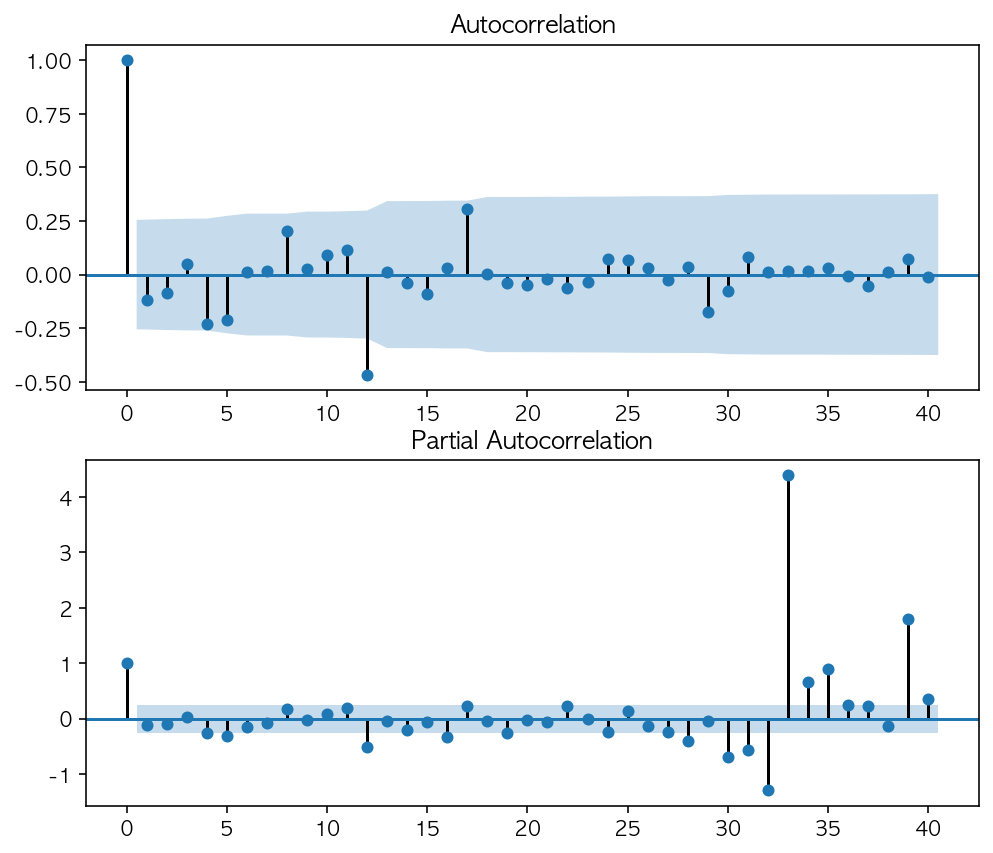

In [343]:
fig = plt.figure(figsize=(8,7))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(tm2.seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(tm2.seasonal_first_difference.iloc[13:],lags=40,ax=ax2)

In [337]:
mod = sm.tsa.SARIMAX(tm2['가격'], trend='ct',order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print (results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                   가격   No. Observations:                   72
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -590.910
Date:                              Thu, 19 Mar 2020   AIC                           1191.820
Time:                                      14:40:16   BIC                           1202.208
Sample:                                           0   HQIC                          1195.875
                                               - 72                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -629.0157   2437.707     -0.258      0.796   -5406.834    4148.802
drift         11.35

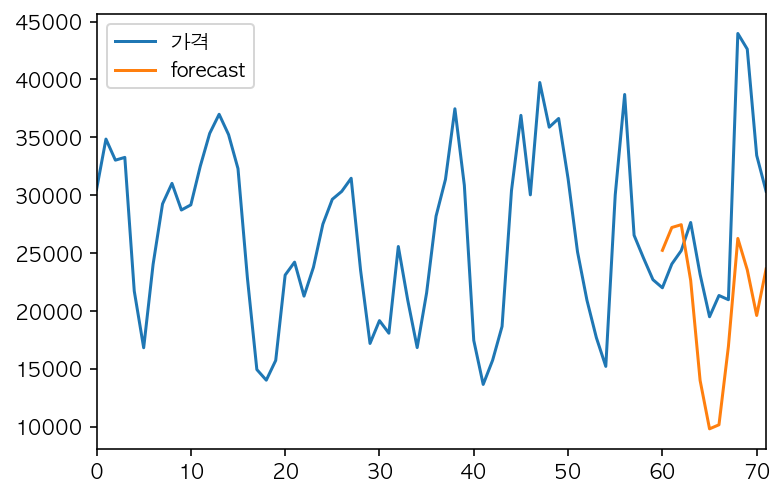

In [338]:
tm2['forecast'] = results.predict(start = len(tm2)-12, end= len(tm2), dynamic= True)  
tm2[['가격', 'forecast']].plot()
# tm2[-12:]